# 2° Parcial - Termodinámica
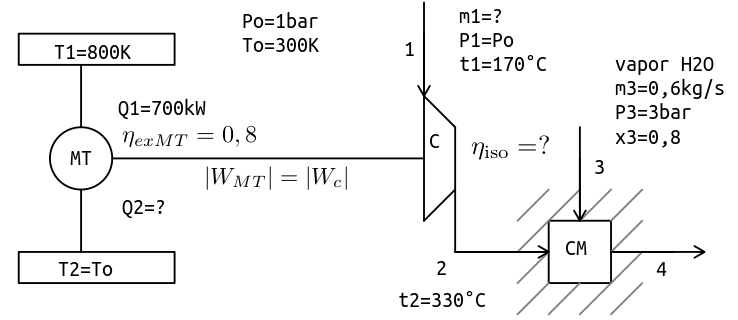

__Calcular:__
1. $\Delta S_u$
2. $\eta_\mathrm{ex,proceso}$
3. $\eta_\mathrm{iso,comp}$

## Solución
$$ \Delta S_1 = \frac{Q_1}{T_1} $$

$$ Q_{U1} = Q_1 - T_0 \Delta S_1 $$

In [ ]:
Q1 = 700e3 # kW
T1 = 800 # K
T0 = 300 # K
T2 = T0

DS1 = Q1/T1
QU1 = Q1 - T0*DS1

In [ ]:
#@title
print('DS1 = %s kJ/K'%round(DS1/1000,4))
print('QU1 = %s kJ/s'%round(QU1/1000,2))

DS1 = 0.875 kJ/K
QU1 = 437.5 kJ/s


$$ Q_{U2} = Q_2 - T_0 \, \frac{Q_2}{T_2} \quad \rightarrow \quad Q_{U2} = 0 $$

$$ \eta_{ex,MT} = \frac{W_{MT} + |Q_{U2}|}{|Q_{U1}|} \quad \rightarrow \quad W_{MT} = \eta_{ex,MT} |Q_{U1}| $$

In [ ]:
eta_exMT = 0.8

W_MT = eta_exMT*abs(QU1)

In [ ]:
#@title
print('W_MT = %s kW'%round(W_MT/1000,2))

W_MT = 350.0 kW


$$ W_{MT} = Q_1 + Q_2 $$

$$ Q_2 = W_{MT} - Q_1 $$

In [ ]:
Q2 = W_MT - Q1

In [ ]:
#@title
print('Q2 = %s kJ/s'%round(Q2/1000,2))

Q2 = -350.0 kJ/s


In [ ]:
!pip install CoolProp # (Google Colab only)
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 4.3 MB/s 


$\left.
\begin{array}{l}
P_1 = 1 \, \mathrm{bar} \\
t_1 = 170^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_1 \\
s_1
\end{array}
\right]
$

$\left.
\begin{array}{l}
P_2 = 3 \, \mathrm{bar} \\
t_2 = 330^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_2 \\
s_2
\end{array}
\right]
$

In [ ]:
P1 = 1e5 # Pa
T1 = 170 + 273.15 # K
P2 = 3e5 # Pa
T2 = 330 + 273.15 # K

h1 = cp.PropsSI('H','P',P1,'T',T1,'Water')
s1 = cp.PropsSI('S','P',P1,'T',T1,'Water')
h2 = cp.PropsSI('H','P',P2,'T',T2,'Water')
s2 = cp.PropsSI('S','P',P2,'T',T2,'Water')

In [ ]:
#@title
print('h1 = %s kJ/kg'%round(h1/1000,2))
print('s1 = %s kJ/kg·K'%round(s1/1000,5))
print('---------------')
print('h2 = %s kJ/kg'%round(h2/1000,2))
print('s2 = %s kJ/kg·K'%round(s2/1000,5))

h1 = 2816.2 kJ/kg
s1 = 7.70619 kJ/kg·K
---------------
h2 = 3130.9 kJ/kg
s2 = 7.80799 kJ/kg·K


### Compresor:
$|W_c| \equiv |W_{MT}|$
$$ \Delta H = \overbrace{Q}^{= \, 0} = W $$

$$ W_c = m (h_2 - h_1) $$

$$ m = \frac{W_c}{h_2 - h_1} $$

In [ ]:
Wc = W_MT

m = Wc/(h2 - h1)

In [ ]:
#@title
print('m = %s kg/s'%round(m,4))

m = 1.1122 kg/s


$$\left.
\begin{array}{l}
s_{2rev} = s_1 \\
P_3 = P_2 = 3 \, \mathrm{bar}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
T_2 \\
h_{2rev}
\end{array}
\right]
$$

In [ ]:
s2rev = s1
P3 = 3e5 # Pa
P2 = P3

phase2 = cp.PhaseSI('P',P2,'S',s2rev,'Water')
T2 = cp.PropsSI('T','P',P2,'S',s2rev,'Water')
h2rev = cp.PropsSI('H','P',P2,'S',s2rev,'Water')

In [ ]:
#@title
print('Fase = %s'%phase2)
print('T2 = %s K = %s°C'%(round(T2,2),round(T2 - 273.15,2)))
print('h2rev = %s kJ/kg'%round(h2rev/1000,2))

Fase = gas
T2 = 573.85 K = 300.7°C
h2rev = 3071.0 kJ/kg


### Rendimiento isoentrópico del compresor
$$ \eta_\mathrm{iso,comp} = \frac{W_\mathrm{ideal}}{W_\mathrm{real}} = \frac{h_1 - h_{2rev}}{h_1 - h_2} $$

In [ ]:
eta_isoc = (h1 - h2rev)/(h1 - h2)

In [ ]:
#@title
print('eta_isoc = %s'%round(eta_isoc,4))

eta_isoc = 0.8097


### Cámara de mezcla

$\left.
\begin{array}{l}
P_3 = 3 \, \mathrm{bar} \\
x_3 = 0,8
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h'' \\
h'
\end{array}
\right]
$

$$ \begin{array}{l}
h_3 = x_3 (h'' - h') + h' \\
s_3 = x_3 (s'' - s') + s' 
\end{array} $$

In [ ]:
x3 = 0.8
h3p2 = cp.PropsSI('H','P',P3,'Q',1,'Water')
h3p1 = cp.PropsSI('H','P',P3,'Q',0,'Water')
s3p2 = cp.PropsSI('S','P',P3,'Q',1,'Water')
s3p1 = cp.PropsSI('S','P',P3,'Q',0,'Water')

h3 = cp.PropsSI('H','P',P3,'Q',x3,'Water')
s3 = cp.PropsSI('S','P',P3,'Q',x3,'Water')
T3 = cp.PropsSI('T','P',P3,'Q',x3,'Water')

In [ ]:
#@title
print('h3p2 = %s kJ/kg'%round(h3p2/1000,2))
print('h3p1 = %s kJ/kg'%round(h3p1/1000,2))
print('s3p2 = %s kJ/kg·K'%round(s3p2/1000,5))
print('s3p1 = %s kJ/kg·K'%round(s3p1/1000,5))
print('---------------')
print('h3 = %s kJ/kg'%round(h3/1000,2))
print('s3 = %s kJ/kg·K'%round(s3/1000,5))
print('T3 = %s K'%round(T3,2))
print('t3 = %s°C'%round(T3 - 273.15,2))

h3p2 = 2724.88 kJ/kg
h3p1 = 561.43 kJ/kg
s3p2 = 6.99162 kJ/kg·K
s3p1 = 1.67172 kJ/kg·K
---------------
h3 = 2292.19 kJ/kg
s3 = 5.92764 kJ/kg·K
T3 = 406.67 K
t3 = 133.52°C


$$ m_4 = m_2 + m_3 $$

In [ ]:
m2 = m
m3 = 0.6 # kg/s
m4 = m2 + m3

In [ ]:
#@title
print('m4 = %s kg/s'%round(m4,4))

m4 = 1.7122 kg/s


$$ m_2 h_2 + m_3 h_3 = m_4 h_4 $$

$$ h_4 = \frac{m_2 h_2 + m_3 h_3}{m_4} $$

In [ ]:
h4 = (m2*h2 + m3*h3)/m4

In [ ]:
#@title
print('h4 = %s kJ/kg'%round(h4/1000,2))

h4 = 2836.99 kJ/kg


$$ \Delta S_{14} = m_1 (s_4 - s_1) $$

In [ ]:
P4 = P3

cp.PhaseSI('P',P4,'H',h4,'Water')

'gas'

$\left.
\begin{array}{l}
P_4 = P_3 \\
h_4
\end{array}
\right\} \quad \rightarrow \quad
s_4
$

$$ \Delta S_{2-4} = m_2 (s_4 - s_2) $$
$$ \Delta S_{3-4} = m_3 (s_4 - s_3) $$

In [ ]:
s4 = cp.PropsSI('S','P',P4,'H',h4,'Water')
T4 = cp.PropsSI('T','P',P4,'H',h4,'Water')

In [ ]:
#@title
print('s4 = %s kJ/kg·K'%round(s4/1000,5))
print('T4 = %s K'%round(T4,2))
print('t4 = %s°C'%round(T4 - 273.15,2))

s4 = 7.25112 kJ/kg·K
T4 = 459.13 K
t4 = 185.98°C


In [ ]:
m1 = m2

DS14 = m1*(s4 - s1)

In [ ]:
#@title
print('DS14 = %s kJ/K'%round(DS14/1000,5))

DS14 = -0.50611 kJ/K


In [ ]:
DS24 = m2*(s4 - s2)
DS34 = m3*(s4 - s3)

In [ ]:
#@title
print('DS24 = %s kJ/K'%round(DS24/1000,4))
print('DS34 = %s kJ/K'%round(DS34/1000,4))

DS24 = -0.6193 kJ/K
DS34 = 0.7941 kJ/K


### Variación de entropía del universo
$$ \Delta S_u = \Delta S_1 + \Delta S_{14} + \Delta S_{34} $$

In [ ]:
DSu = DS1 + DS14 + DS34

In [ ]:
#@title
print('DSu = %s kJ/K'%round(DSu/1000,5))

DSu = 1.16298 kJ/K


$$\begin{array}{l}
\Delta Ex_{12} = [(h_2 - h_1) - T_0 (s2 - s1)] \, m_1 \\
\Delta Ex_{24} = [(h_4 - h_2) - T_0 (s4 - s2)] \, m_2 \\
\Delta Ex_{34} = [(h_4 - h_3) - T_0 (s4 - s3)] \, m_3
\end{array}$$

In [ ]:
m1 = m
DEx12 = ( (h2 - h1) - T0*(s2 - s1) )*m1
DEx24 = ( (h4 - h2) - T0*(s4 - s2) )*m2
DEx34 = ( (h4 - h3) - T0*(s4 - s4) )*m3

In [ ]:
#@title
print('DEx12 = %s kJ'%round(DEx12/1000,2))
print('DEx24 = %s kJ'%round(DEx24/1000,2))
print('DEx34 = %s kJ'%round(DEx34/1000,2))

DEx12 = 316.03 kJ
DEx24 = -141.08 kJ
DEx34 = 326.88 kJ


### Rendimiento exergético del proceso
$$ \eta_{ex} = \frac{W_{MT} + \Delta Ex_{34} }{ | \Delta Ex_{24} - \Delta Ex_{12} - Q_{U1} | } $$

In [ ]:
eta_ex = (W_MT + DEx34)/( abs(DEx24 - DEx12 - QU1) )

In [ ]:
#@title
print('eta_ex = %s'%round(eta_ex,4))

eta_ex = 0.7566
